### Libraries

In [28]:
import pandas as pd
import numpy as np

from sklearn.feature_selection import VarianceThreshold

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Data Loading

In [11]:
df = pd.read_excel('../SWaT_Dataset_Attack_v0.xlsx', skiprows=[0])
df

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,28/12/2015 10:00:01 AM,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,28/12/2015 10:00:03 AM,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,28/12/2015 10:00:04 AM,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449914,2/1/2016 2:59:55 PM,2.559972,519.5495,2,2,1,168.0979,8.638683,301.9226,2.459488,...,2,1,251.1535,0.865024,189.0220,0.000000,1,1,1,Normal
449915,2/1/2016 2:59:56 PM,2.549082,520.4131,2,2,1,168.0979,8.638683,301.9226,2.459488,...,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1,Normal
449916,2/1/2016 2:59:57 PM,2.531467,520.6878,2,2,1,168.0979,8.638683,301.9226,2.460129,...,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1,Normal
449917,2/1/2016 2:59:58 PM,2.521218,520.7271,2,2,1,168.0979,8.638683,301.9226,2.460129,...,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1,Normal


In [12]:
df.shape

(449919, 53)

### Data Exploration

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449919 entries, 0 to 449918
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0    Timestamp     449919 non-null  object 
 1   FIT101         449919 non-null  float64
 2   LIT101         449919 non-null  float64
 3    MV101         449919 non-null  int64  
 4   P101           449919 non-null  int64  
 5   P102           449919 non-null  int64  
 6    AIT201        449919 non-null  float64
 7   AIT202         449919 non-null  float64
 8   AIT203         449919 non-null  float64
 9   FIT201         449919 non-null  float64
 10   MV201         449919 non-null  int64  
 11   P201          449919 non-null  int64  
 12   P202          449919 non-null  int64  
 13  P203           449919 non-null  int64  
 14   P204          449919 non-null  int64  
 15  P205           449919 non-null  int64  
 16  P206           449919 non-null  int64  
 17  DPIT301        449919 non-nul

In [14]:
df.isnull().values.any() #at least one null value

False

In [15]:
df.describe()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
count,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,...,449919.000000,449919.000000,449919.0,449919.000000,449919.000000,449919.000000,449919.000000,449919.0,449919.000000,449919.0
mean,1.714346,607.019967,1.665335,1.693251,1.006946,210.297302,8.528535,320.301478,1.702908,1.691584,...,0.283806,1.925862,1.0,232.173817,1.013408,174.714484,0.016566,1.0,1.009099,1.0
std,1.191716,125.303003,0.482323,0.461145,0.083051,35.157909,0.114844,16.631029,1.130277,0.470611,...,0.080924,0.261995,0.0,61.750930,0.412723,47.479809,0.159603,0.0,0.094956,0.0
min,0.000000,189.826300,0.000000,1.000000,1.000000,168.033800,6.000000,285.337100,0.000000,0.000000,...,0.000000,1.000000,1.0,9.468726,0.000000,3.140220,0.000000,1.0,1.000000,1.0
25%,0.000000,510.011100,1.000000,1.000000,1.000000,177.102000,8.441618,306.383000,0.000000,1.000000,...,0.306249,2.000000,1.0,248.029400,0.816967,186.698900,0.000000,1.0,1.000000,1.0
50%,2.477020,530.422500,2.000000,2.000000,1.000000,193.508100,8.551525,321.661100,2.446673,2.000000,...,0.306633,2.000000,1.0,249.295100,0.961138,187.724300,0.000000,1.0,1.000000,1.0
75%,2.577907,727.432100,2.000000,2.000000,1.000000,253.845200,8.610806,331.684200,2.454362,2.000000,...,0.308106,2.000000,1.0,250.881200,1.409669,189.118200,0.000128,1.0,1.000000,1.0
max,2.760145,925.032300,2.000000,2.000000,2.000000,267.719800,8.733210,384.465500,2.826899,2.000000,...,0.311693,2.000000,1.0,254.341800,1.970333,191.986000,1.802710,1.0,2.000000,1.0


In [16]:
print("Total target classes:")
print("----------------------")
print(df["Normal/Attack"].value_counts()) 

Total target classes:
----------------------
Normal     395298
Attack      54584
A ttack        37
Name: Normal/Attack, dtype: int64


### Variance-Threshold Test for numerical variables

In [17]:
#numerical variables
numerical = df.select_dtypes( ['int64','float64']).columns
numerical

Index(['FIT101', 'LIT101', ' MV101', 'P101', 'P102', ' AIT201', 'AIT202',
       'AIT203', 'FIT201', ' MV201', ' P201', ' P202', 'P203', ' P204', 'P205',
       'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', ' MV303',
       'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401',
       'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504',
       'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT501',
       'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603'],
      dtype='object')

In [18]:
df[numerical]

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
0,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,0.307786,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1
1,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,0.307786,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1
2,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,0.308619,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1
3,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,0.308619,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1
4,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,2,...,0.308619,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449914,2.559972,519.5495,2,2,1,168.0979,8.638683,301.9226,2.459488,2,...,0.306569,2,1,251.1535,0.865024,189.0220,0.000000,1,1,1
449915,2.549082,520.4131,2,2,1,168.0979,8.638683,301.9226,2.459488,2,...,0.306569,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1
449916,2.531467,520.6878,2,2,1,168.0979,8.638683,301.9226,2.460129,2,...,0.306569,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1
449917,2.521218,520.7271,2,2,1,168.0979,8.638683,301.9226,2.460129,2,...,0.307978,2,1,251.0734,0.865024,188.9259,0.000000,1,1,1


In [21]:
var_thr = VarianceThreshold(threshold = 0.2) #Removing features that are at least 80% constant
var_thr.fit(df[numerical])

var_thr.get_support()

#True: Low Variance 
#False: High Variance

array([ True,  True,  True,  True, False,  True, False,  True,  True,
        True, False, False,  True, False,  True, False,  True,  True,
        True, False,  True, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False])

In [22]:
cons_cols = [column for column in df[numerical].columns 
          if column not in df[numerical].columns[var_thr.get_support()]]

In [23]:
for features in cons_cols:
    print(features)

P102
AIT202
 P201
 P202
 P204
P206
MV301
 MV303
MV304
P301
P302
AIT401
P401
P402
P403
P404
UV401
AIT501
FIT501
FIT502
FIT503
FIT504
P501
P502
PIT502
FIT601
P601
P602
P603


In [24]:
df = df.drop(cons_cols,axis=1)

In [25]:
df

,Timestamp,FIT101,LIT101,MV101,P101,AIT201,AIT203,FIT201,MV201,P203,...,MV302,AIT402,FIT401,LIT401,AIT502,AIT503,AIT504,PIT501,PIT503,Normal/Attack
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,262.0161,328.6337,2.445391,2,2,...,2,156.0882,1.713517,942.0662,145.1166,264.5475,12.03538,250.8652,189.5988,Normal
1,28/12/2015 10:00:01 AM,2.446274,522.8860,2,2,262.0161,328.6337,2.445391,2,2,...,2,156.0882,1.715952,942.0277,145.1166,264.5475,12.03538,250.8652,189.6789,Normal
2,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,262.0161,328.6337,2.442316,2,2,...,2,156.0882,1.715952,941.8739,145.1166,264.5475,12.03538,250.8812,189.6789,Normal
3,28/12/2015 10:00:03 AM,2.534350,522.9645,2,2,262.0161,328.6337,2.442316,2,2,...,2,156.0882,1.714670,941.7970,145.0141,264.5475,12.03538,250.8812,189.6148,Normal
4,28/12/2015 10:00:04 AM,2.569260,523.4748,2,2,262.0161,328.6337,2.443085,2,2,...,2,156.0882,1.714670,942.2200,144.8859,264.5475,12.03538,250.8812,189.5027,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449914,2/1/2016 2:59:55 PM,2.559972,519.5495,2,2,168.0979,301.9226,2.459488,2,2,...,2,145.6037,1.705315,956.8701,139.1182,257.1136,14.80390,251.1535,189.0220,Normal
449915,2/1/2016 2:59:56 PM,2.549082,520.4131,2,2,168.0979,301.9226,2.459488,2,2,...,2,145.6037,1.705315,957.1777,139.1182,257.1136,14.80390,251.0734,188.9259,Normal
449916,2/1/2016 2:59:57 PM,2.531467,520.6878,2,2,168.0979,301.9226,2.460129,2,2,...,2,145.5524,1.706212,957.2930,139.1182,257.1136,14.80390,251.0734,188.9259,Normal
449917,2/1/2016 2:59:58 PM,2.521218,520.7271,2,2,168.0979,301.9226,2.460129,2,2,...,2,145.5524,1.706212,957.6775,139.1182,257.1136,14.80390,251.0734,188.9259,Normal


In [26]:
print(df.columns)

Index([' Timestamp', 'FIT101', 'LIT101', ' MV101', 'P101', ' AIT201', 'AIT203',
       'FIT201', ' MV201', 'P203', 'P205', 'DPIT301', 'FIT301', 'LIT301',
       'MV302', 'AIT402', 'FIT401', 'LIT401', 'AIT502', 'AIT503', 'AIT504',
       'PIT501', 'PIT503', 'Normal/Attack'],
      dtype='object')


### Data Visualization

In [27]:
features = df.drop([' Timestamp'],axis=1)
features.index = df[' Timestamp']
features.head()

,FIT101,LIT101,MV101,P101,AIT201,AIT203,FIT201,MV201,P203,P205,...,MV302,AIT402,FIT401,LIT401,AIT502,AIT503,AIT504,PIT501,PIT503,Normal/Attack
Timestamp,,,,,,,,,,,,,,,,,,,,,
28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,262.0161,328.6337,2.445391,2,2,2,...,2,156.0882,1.713517,942.0662,145.1166,264.5475,12.03538,250.8652,189.5988,Normal
28/12/2015 10:00:01 AM,2.446274,522.8860,2,2,262.0161,328.6337,2.445391,2,2,2,...,2,156.0882,1.715952,942.0277,145.1166,264.5475,12.03538,250.8652,189.6789,Normal
28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,262.0161,328.6337,2.442316,2,2,2,...,2,156.0882,1.715952,941.8739,145.1166,264.5475,12.03538,250.8812,189.6789,Normal
28/12/2015 10:00:03 AM,2.534350,522.9645,2,2,262.0161,328.6337,2.442316,2,2,2,...,2,156.0882,1.714670,941.7970,145.0141,264.5475,12.03538,250.8812,189.6148,Normal
28/12/2015 10:00:04 AM,2.569260,523.4748,2,2,262.0161,328.6337,2.443085,2,2,2,...,2,156.0882,1.714670,942.2200,144.8859,264.5475,12.03538,250.8812,189.5027,Normal


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000014FE44EE648>],
      dtype=object)

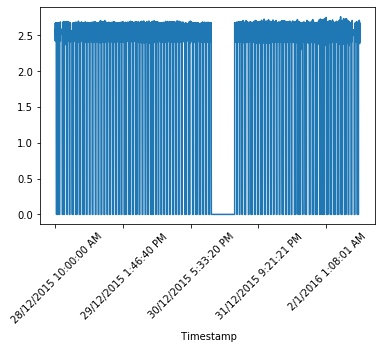

In [48]:
features['FIT101'].plot(subplots=True,rot=45)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000014FEAA4C588>],
      dtype=object)

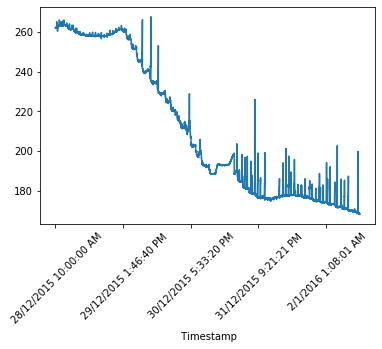

In [49]:
features[' AIT201'].plot(subplots=True,rot=45)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000014FE45271C8>],
      dtype=object)

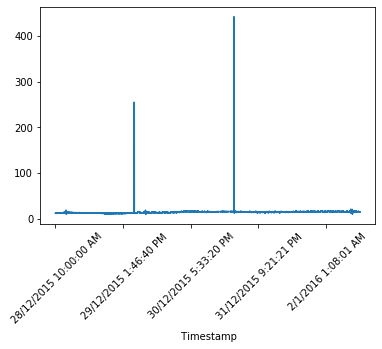

In [50]:
features['AIT504'].plot(subplots=True,rot=45)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000014FEE3CBA88>],
      dtype=object)

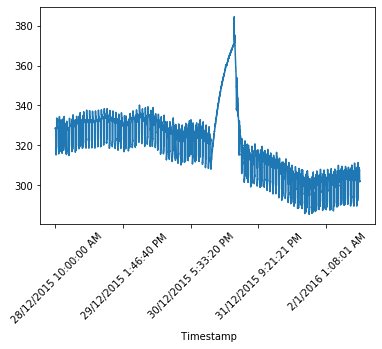

In [51]:
features['AIT203'].plot(subplots=True,rot=45)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000014FF0076E88>],
      dtype=object)

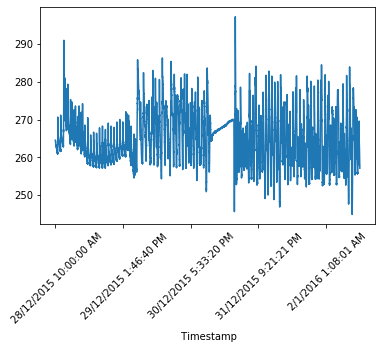

In [52]:
features['AIT503'].plot(subplots=True,rot=45)